<a href="https://colab.research.google.com/github/lucash-h/SENG474/blob/main/DecisionTree_ReducedErrPruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy


from google.colab import drive

from sklearn import tree
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [55]:
def is_leaf(model, index):
  if ((model.tree_.children_left[index] == -1) & (model.tree_.children_right[index] == -1)) :
    return True
  else:
    return False

In [56]:
def print_model(model):
  plt.figure(figsize=(23, 23))
  plot_tree(model, filled=True)
  plt.show()

In [57]:
def prune_tree(model, index, x_value, y_value):
     # Base case: If the node is a leaf, do nothing
    if is_leaf(dtc, index):
      return

    #hold old values
    left_child = model.tree_.children_left[index]
    right_child = model.tree_.children_right[index]

    current_accuracy = model.score(x_value, y_value)


    prune_tree(model, left_child, x_value, y_value)
    prune_tree(model, right_child, x_value, y_value)

    #make them leaf nodes
    model.tree_.children_left[index] = -1
    model.tree_.children_right[index] = -1

    new_accuracy = model.score(x_value, y_value)

    #measure accuracy for changed tree

    if(new_accuracy < current_accuracy): #if pruning doesn't improve accuracy add children back
      model.tree_.children_left[index] = left_child
      model.tree_.children_right[index] = right_child

In [58]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [60]:
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

In [63]:
print(np.shape(df))
print(x.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


In [64]:
print(x.iloc[0])

0.000        0.21
0.640        0.28
0.640.1      0.50
0.000.1      0.00
0.320        0.14
             ... 
0.000.820    0.00
0.000.821    0.00
0.000.822    0.00
0.000.823    0.00
0.000.824    0.00
Name: 0, Length: 1185, dtype: float64


In [66]:
print(y.iloc[0])

1


In [67]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=0.6, random_state=0, shuffle=False)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state = 0, shuffle = False)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(2760, 1185)
(2760,)
(920, 1185)
(920,)
(920, 1185)
(920,)


In [69]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0).fit(x_train, y_train)  # Exclude the target column name

In [70]:
accuracy_before_pruning = dtc.score(x_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

Accuracy before pruning: 0.6869565217391305


In [71]:
node_count = dtc.tree_.node_count

for i in range(0, node_count):
  og_score = dtc.score(x_validation, y_validation)
  cloned = copy.deepcopy(dtc)
  prune_tree(cloned,i, x_validation, y_validation)
  new_score = cloned.score(x_validation, y_validation)
  if(og_score < new_score):
    dtc = cloned
    #if pruned tree is better or equal
    #keep pruned tree I guess
  if(og_score-new_score != 0):
    print(f"ORIGINAL ACCURACY: {og_score} NEW ACCURACY: {new_score} DIFFERENCE: {og_score-new_score}")

ORIGINAL ACCURACY: 0.9021739130434783 NEW ACCURACY: 0.9456521739130435 DIFFERENCE: -0.04347826086956519


In [50]:
accuracy_after_pruning = dtc.score(x_test, y_test)

In [51]:
print(f"ACCURACY BEFORE PRUNING IS {accuracy_before_pruning} \nACCURACY AFTER PRUNING IS {accuracy_after_pruning}")

ACCURACY BEFORE PRUNING IS 0.6869565217391305 
ACCURACY AFTER PRUNING IS 0.758695652173913


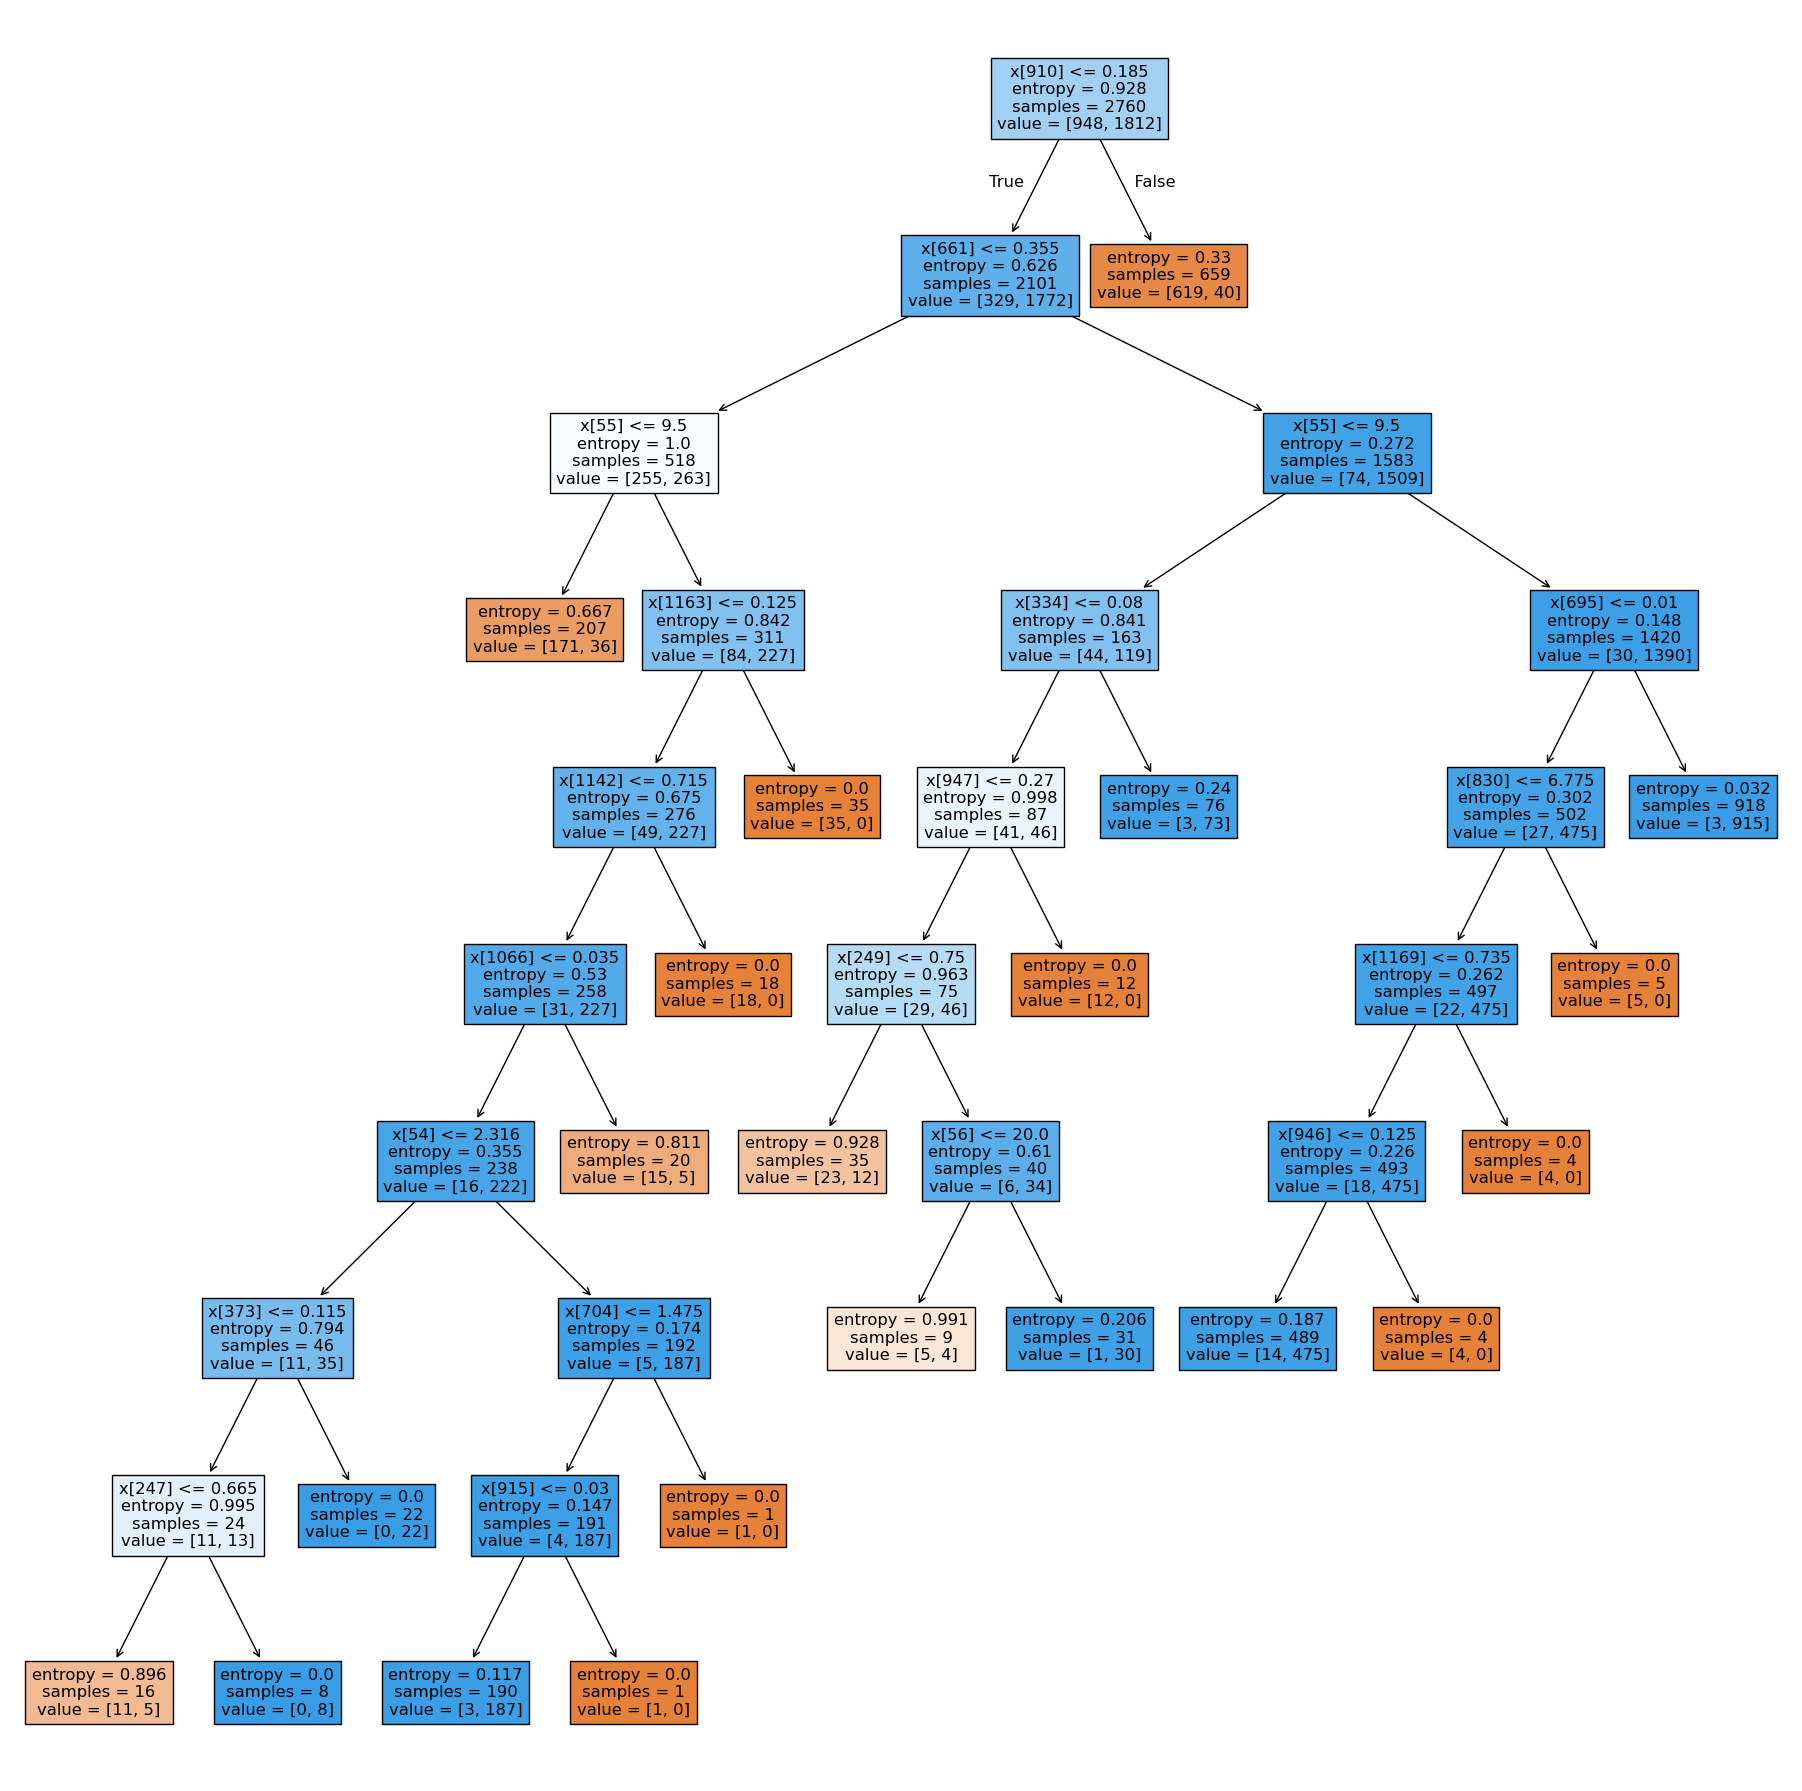

In [52]:
print_model(dtc)